In [259]:
# Importamos las librerias que necesitamos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import missingno as msno
from dateutil.relativedelta import relativedelta
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

In [260]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [261]:
# Cargamos el archivo CSV con los datos

df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/TFM_final/data_creditos_completo9.csv", encoding = 'unicode_escape', engine ='python', sep = ";")
df

,Sexo,EstadoCivil,FechaNacimiento,Instruccion,CodigoBarrio,NumeroCargas,TipoActividad,NumeroCredito,Monto,NumeroCuotas,...,Tasa,Calificacion,encaje,tipo,vivienda,totalActivo,totalPasivo,Ingresos,Gastos,MoraCredito
0,Femenino,Casado,10/6/1970,P,18096707,0,Independiente,2891,600,10,...,23.00,Microcrédito,0,Ordinario Cuota Fija,PROPIA NO HIPOTECADA,20900,"34,47",850,"442,94",0
1,Masculino,Soltero,15/9/1992,G,18095004,0,Empleado Privado,3821,600,6,...,23.50,Microcrédito,0,Ordinario Cuota Variable,VIVE CON FAMILIARES,28900,3500,1450,820,0
2,Masculino,Soltero,3/4/1986,U,18010101,0,Empleado Privado,6223,8000,38,...,21.50,Microcrédito,0,Ordinario Cuota Fija,ARRENDADA,18000,"1345,05",2000,"1019,98",0
3,Masculino,Soltero,3/6/1995,S,18016508,0,Independiente,6932,3000,24,...,18.00,Microcrédito,0,Ordinario Cuota Fija,PROPIA NO HIPOTECADA,53500,8000,1500,295,0
4,Masculino,Casado,4/2/1990,P,18096504,1,Independiente,3089,1500,18,...,21.00,Microcrédito,0,Ordinario Cuota Fija,PROPIA NO HIPOTECADA,38000,"48940,43",3450,"1077,78",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7675,Masculino,Casado,13/7/1981,P,18095004,0,Empleado Privado,2120,1000,6,...,22.50,Microcrédito,0,Ordinario Cuota Variable,VIVE CON FAMILIARES,13750,"3571,77",1908,"1255,6",0
7676,Femenino,Soltero,1/9/1991,P,18096306,0,Empleado Privado,3518,650,8,...,23.50,Microcrédito,0,Ordinario Cuota Fija,PROPIA NO HIPOTECADA,"8352,8","7485,96",650,"377,19",1
7677,Femenino,Casado,5/8/1989,P,18096302,0,Independiente,748,530,12,...,23.50,Microcrédito,0,Ordinario Cuota Fija,PROPIA NO HIPOTECADA,5500,1,200,160,0
7678,Femenino,Casado,14/3/1972,P,18015522,0,Independiente,8562,3700,17,...,19.50,Microcrédito,0,Ordinario Cuota Fija,PROPIA NO HIPOTECADA,37000,2100,1766,765,1


In [262]:
#Observamos un resumen del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7680 entries, 0 to 7679
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sexo             7680 non-null   object 
 1   EstadoCivil      7680 non-null   object 
 2   FechaNacimiento  7680 non-null   object 
 3   Instruccion      7680 non-null   object 
 4   CodigoBarrio     7680 non-null   int64  
 5   NumeroCargas     7680 non-null   int64  
 6   TipoActividad    7676 non-null   object 
 7   NumeroCredito    7680 non-null   int64  
 8   Monto            7680 non-null   object 
 9   NumeroCuotas     7680 non-null   int64  
 10  ValorCuota       7680 non-null   object 
 11  FechaEntrega     7680 non-null   object 
 12  Tasa             7680 non-null   float64
 13  Calificacion     7680 non-null   object 
 14  encaje           7680 non-null   object 
 15  tipo             7680 non-null   object 
 16  vivienda         7668 non-null   object 
 17  totalActivo   

In [263]:
# Revisamos el tamaño del DataFrame
# El primer número son las filas y el segundo las columnas
df.shape

(7680, 22)

In [264]:
#Verificar si existen NULL o vacios en el DataFrame
# Se observa la distribución de los valores nulos en el DataFrame.

df.isnull().sum()

,0
Sexo,0
EstadoCivil,0
FechaNacimiento,0
Instruccion,0
CodigoBarrio,0
NumeroCargas,0
TipoActividad,4
NumeroCredito,0
Monto,0
NumeroCuotas,0


In [265]:
# Se observa la variable "TipoActividad"

df["TipoActividad"].value_counts()

,count
TipoActividad,
Independiente,4292
--Seleccione Tipo Empleo--,2235
Empleado Privado,1026
Empleado Publico,123


In [266]:
# Se observa en la matriz que la variable TipoActividad tiene
# Se decide eliminar por ser pocos registros nulos

# Filtrar los registros donde la columna 'NombreVariable' es nula
nulos = df[df['TipoActividad'].isnull()]

# Mostrar los registros nulos
print(nulos)

          Sexo EstadoCivil FechaNacimiento Instruccion  CodigoBarrio  \
1476  Femenino     Soltero      20/11/1956           P      18015503   
4168  Femenino     Soltero      20/11/1956           P      18015503   
4324  Femenino     Soltero      20/11/1956           P      18015503   
4986  Femenino     Soltero      20/11/1956           P      18015503   

      NumeroCargas TipoActividad  NumeroCredito Monto  NumeroCuotas  ...  \
1476             0           NaN           5838  4000            31  ...   
4168             0           NaN           3193  2000            24  ...   
4324             0           NaN           4753  2000            24  ...   
4986             0           NaN           1651  2000            24  ...   

      Tasa  Calificacion  encaje                  tipo             vivienda  \
1476  21.5  Microcrédito       0  Ordinario Cuota Fija  VIVE CON FAMILIARES   
4168  23.0  Microcrédito       0  Ordinario Cuota Fija  VIVE CON FAMILIARES   
4324  21.5  Microcréd

In [267]:
# Se elimina registros donde TipoActividad es NULL

df = df.dropna(subset=['TipoActividad'])
# Verificar si la columna 'B' tiene valores nulos
has_null_TipoActividad = df['TipoActividad'].isna().any()
print(has_null_TipoActividad)

False


In [268]:
# Se observa la variable "vivienda"

df["vivienda"].value_counts()

,count
vivienda,
VIVE CON FAMILIARES,3879
PROPIA NO HIPOTECADA,3463
ARRENDADA,147
PROPIA HIPOTECADA,120
PRESTADA,55


In [269]:
# Se calcula la moda de la columna 'vivienda'
moda_vivienda = df['vivienda'].mode()[0]

# Se reemplaza los valores NaN en 'vivienda' con la moda utilizando .loc
df.loc[:, 'vivienda'] = df['vivienda'].fillna(moda_vivienda)

df['vivienda'].value_counts()

,count
vivienda,
VIVE CON FAMILIARES,3891
PROPIA NO HIPOTECADA,3463
ARRENDADA,147
PROPIA HIPOTECADA,120
PRESTADA,55


In [270]:
# Se analiza un resumen estadístico de las columnas numéricas

df.describe()

,CodigoBarrio,NumeroCargas,NumeroCredito,NumeroCuotas,Tasa,MoraCredito
count,7.676000e+03,7676.000000,7676.000000,7676.000000,7676.000000,7676.000000
mean,1.805791e+07,0.568395,4555.821391,19.708051,21.013138,0.204534
std,5.784717e+05,0.943422,2681.144726,12.558225,2.851126,0.403387
min,2.010301e+06,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.807020e+07,0.000000,2273.750000,12.000000,20.500000,0.000000
50%,1.809630e+07,0.000000,4527.500000,15.000000,21.500000,0.000000
75%,1.809661e+07,1.000000,6703.250000,24.000000,22.440000,0.000000
max,2.301020e+07,6.000000,10817.000000,96.000000,36.000000,1.000000


In [271]:
# Resumen estadístico de columnas categóricas (tipo object)

df.describe(include=["O"])

,Sexo,EstadoCivil,FechaNacimiento,Instruccion,TipoActividad,Monto,ValorCuota,FechaEntrega,Calificacion,encaje,tipo,vivienda,totalActivo,totalPasivo,Ingresos,Gastos
count,7676,7676,7676,7676,7676,7676,7676,7676,7676,7676,7676,7676,7676,7676,7676,7676
unique,2,5,2337,6,4,502,2646,2941,5,222,2,5,595,823,734,1258
top,Femenino,Casado,6/5/1990,P,Independiente,1000,"83,33",16/12/2016,Microcrédito,0,Ordinario Cuota Fija,VIVE CON FAMILIARES,0,0,0,0
freq,4117,3984,30,4816,4292,1043,1117,25,7397,6790,6440,3891,2431,3282,2329,2306


In [272]:
# Se observan variables que son de tipo Object pero su contenido es de tipo float
# "Monto", "ValorCuota", "encaje","totalActivo", "totalPasivo", "Ingresos", "Gastos" es necesario convertirlas a tipo float

# Se observa la categoría "Monto"
# Se reemplaza la "," por "."
# Se transforma a decimal

df["Monto"]= df["Monto"].str.replace(",", ".")
df['Monto'] = df['Monto'].astype(float)
df["Monto"].value_counts()

<ipython-input-272-89fb68aa18ca>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Monto"]= df["Monto"].str.replace(",", ".")
<ipython-input-272-89fb68aa18ca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Monto'] = df['Monto'].astype(float)


,count
Monto,
1000.00,1043
2000.00,817
600.00,548
3000.00,514
5000.00,480
...,...
219.02,1
330.00,1
12600.00,1


In [273]:
# Se observa la variable "ValorCuota"
# Se reemplaza la "," por "."
# Se transforma a decimal

df["ValorCuota"]= df["ValorCuota"].str.replace(",", ".")
df['ValorCuota'] = df['ValorCuota'].astype(float)
df["ValorCuota"].value_counts()

<ipython-input-273-894ac2046b2c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ValorCuota"]= df["ValorCuota"].str.replace(",", ".")
<ipython-input-273-894ac2046b2c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ValorCuota'] = df['ValorCuota'].astype(float)


,count
ValorCuota,
83.33,1117
50.00,549
125.00,337
166.67,316
100.00,260
...,...
77.49,1
306.14,1
58.67,1


In [274]:
# Se observa la categoría "encaje"
# Se reemplaza la "," por "."
# Se transforma a decimal

df["encaje"].value_counts()
df["encaje"]= df["encaje"].str.replace(",", ".")
df['encaje'] = df['encaje'].astype(float)
df["encaje"].value_counts()

<ipython-input-274-c5a17c033858>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["encaje"]= df["encaje"].str.replace(",", ".")
<ipython-input-274-c5a17c033858>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encaje'] = df['encaje'].astype(float)


,count
encaje,
0.0,6790
120.0,48
68.0,36
150.0,34
90.0,31
...,...
63.0,1
101.0,1
338.7,1


In [275]:
# Se observa la categoría "totalActivo"
# Se reemplaza la "," por "."
# Se transforma a decimal

df["totalActivo"].value_counts()
df["totalActivo"]= df["totalActivo"].str.replace(",", ".")
df['totalActivo'] = df['totalActivo'].astype(float)
df["totalActivo"].value_counts()

<ipython-input-275-6d1daf0d7759>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["totalActivo"]= df["totalActivo"].str.replace(",", ".")
<ipython-input-275-6d1daf0d7759>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['totalActivo'] = df['totalActivo'].astype(float)


,count
totalActivo,
0.0,2431
8000.0,73
1500.0,71
6000.0,63
2500.0,62
...,...
43200.0,1
99500.0,1
46900.0,1


In [276]:
# Se observa la categoría "totalPasivo"
# Se reemplaza la "," por "."
# Se transforma a decimal

df["totalPasivo"].value_counts()
df["totalPasivo"]= df["totalPasivo"].str.replace(",", ".")
df['totalPasivo'] = df['totalPasivo'].astype(float)
df["totalPasivo"].value_counts()

<ipython-input-276-5d42dfaf076e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["totalPasivo"]= df["totalPasivo"].str.replace(",", ".")
<ipython-input-276-5d42dfaf076e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['totalPasivo'] = df['totalPasivo'].astype(float)


,count
totalPasivo,
0.00,3282
1.00,410
0.01,199
2.00,72
2000.00,69
...,...
7713.96,1
5185.85,1
6650.00,1


In [277]:
# Se observa la categoría "Ingresos"
# Se reemplaza la "," por "."
# Se transforma a decimal

df["Ingresos"].value_counts()
df["Ingresos"]= df["Ingresos"].str.replace(",", ".")
df['Ingresos'] = df['Ingresos'].astype(float)
df["Ingresos"].value_counts()

<ipython-input-277-1822179df53a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ingresos"]= df["Ingresos"].str.replace(",", ".")
<ipython-input-277-1822179df53a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ingresos'] = df['Ingresos'].astype(float)


,count
Ingresos,
0.00,2329
500.00,146
600.00,138
1200.00,136
1000.00,122
...,...
3328.00,1
415.00,1
762.88,1


In [278]:
# Se observa la categoría "Gastos"
# Se reemplaza la "," por "."
# Se transforma a decimal

df["Gastos"].value_counts()
df["Gastos"]= df["Gastos"].str.replace(",", ".")
df['Gastos'] = df['Gastos'].astype(float)
df["Gastos"].value_counts()

<ipython-input-278-6b06dd406417>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gastos"]= df["Gastos"].str.replace(",", ".")
<ipython-input-278-6b06dd406417>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gastos'] = df['Gastos'].astype(float)


,count
Gastos,
0.00,2306
1.00,38
250.00,31
270.00,29
100.00,28
...,...
698.26,1
1056.94,1
535.64,1


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7676 entries, 0 to 7679
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sexo             7676 non-null   object 
 1   EstadoCivil      7676 non-null   object 
 2   FechaNacimiento  7676 non-null   object 
 3   Instruccion      7676 non-null   object 
 4   CodigoBarrio     7676 non-null   int64  
 5   NumeroCargas     7676 non-null   int64  
 6   TipoActividad    7676 non-null   object 
 7   NumeroCredito    7676 non-null   int64  
 8   Monto            7676 non-null   float64
 9   NumeroCuotas     7676 non-null   int64  
 10  ValorCuota       7676 non-null   float64
 11  FechaEntrega     7676 non-null   object 
 12  Tasa             7676 non-null   float64
 13  Calificacion     7676 non-null   object 
 14  encaje           7676 non-null   float64
 15  tipo             7676 non-null   object 
 16  vivienda         7676 non-null   object 
 17  totalActivo      76

In [280]:
# Se observan las variables categóricas
#"Sexo", "EstadoCivil","Instruccion","TipoActividad","Calificacion","tipo","vivienda"

sexo_counts = df["Sexo"].value_counts()
estado_civil_counts = df["EstadoCivil"].value_counts()
instruccion_counts = df["Instruccion"].value_counts()
tipo_actividad_counts = df["TipoActividad"].value_counts()
calificacion_counts = df["Calificacion"].value_counts()
tipo_counts = df["tipo"].value_counts()
vivienda_counts = df["vivienda"].value_counts()

# Mostrar resultados
print("Conteos de valores en la columna 'Sexo':")
print(sexo_counts)
print()

print("Conteos de valores en la columna 'EstadoCivil':")
print(estado_civil_counts)
print()

print("Conteos de valores en la columna 'Instruccion':")
print(instruccion_counts)
print()

print("Conteos de valores en la columna 'TipoActividad':")
print(tipo_actividad_counts)
print()

print("Conteos de valores en la columna 'Calificacion':")
print(calificacion_counts)
print()

print("Conteos de valores en la columna 'Tipo':")
print(tipo_counts)
print()

print("Conteos de valores en la columna 'vivienda':")
print(vivienda_counts)


Conteos de valores en la columna 'Sexo':
Sexo
Femenino     4117
Masculino    3559
Name: count, dtype: int64

Conteos de valores en la columna 'EstadoCivil':
EstadoCivil
Casado         3984
Soltero        2548
Divorciado      553
Unión Libre     302
Viudo           289
Name: count, dtype: int64

Conteos de valores en la columna 'Instruccion':
Instruccion
P    4816
S    2010
U     632
N     133
G      54
T      31
Name: count, dtype: int64

Conteos de valores en la columna 'TipoActividad':
TipoActividad
Independiente                 4292
--Seleccione Tipo Empleo--    2235
Empleado Privado              1026
Empleado Publico               123
Name: count, dtype: int64

Conteos de valores en la columna 'Calificacion':
Calificacion
Microcrédito    7397
Consumo          242
Vivienda          23
Inmobiliario      12
Comercial          2
Name: count, dtype: int64

Conteos de valores en la columna 'Tipo':
tipo
Ordinario Cuota Fija        6440
Ordinario Cuota Variable    1236
Name: count, dtype: 

In [281]:
#Se reemplaza el valor erróneo “--Seleccione Tipo Empleo--” de “TipoActividad”
# y los valores vacíos por el valor que más se repite según la variable “Instruccion”
# Paso 1: Calcular la moda de ”TipoActividad” para cada “Instrucción

def calcular_moda(grupo):
    try:
        return grupo.mode().iloc[0]
    except IndexError:
        return None  # Si no hay moda, devolver None

# Filtrar las filas que no tienen el valor erróneo y agrupar por “Instrucción” para calcular la moda
moda_por_instruccion = df[df['TipoActividad'] != '--Seleccione Tipo Empleo--'].groupby('Instruccion')['TipoActividad'].apply(calcular_moda)

# Imprimir la moda para verificar
print("Moda por Instrucción:\n", moda_por_instruccion)

# Paso 2: Reemplazar los valores erróneos y nulos según la moda por "Instruccion"
def reemplazar_tipo_actividad(row):
    instruccion = row['Instruccion']
    tipo_actividad = row['TipoActividad']

    # Se verifica si el TipoActividad es el valor incorrecto o si es nulo
    if pd.isnull(tipo_actividad) or tipo_actividad == '--Seleccione Tipo Empleo--':
        # Se reemplaza con la moda correspondiente si está disponible
        if instruccion in moda_por_instruccion.index:
            return moda_por_instruccion[instruccion]
        else:
            # Si la instrucción no tiene moda calculada, se mantiene el valor original (nulo o erróneo)
            return tipo_actividad
    else:
        return tipo_actividad

# Se aplica la función al DataFrame
df['TipoActividad'] = df.apply(reemplazar_tipo_actividad, axis=1)

# Verificar los cambios en la columna TipoActividad
df["TipoActividad"].value_counts()

Moda por Instrucción:
 Instruccion
G       Independiente
N       Independiente
P       Independiente
S       Independiente
T       Independiente
U    Empleado Privado
Name: TipoActividad, dtype: object


<ipython-input-281-1eb41aef28e2>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TipoActividad'] = df.apply(reemplazar_tipo_actividad, axis=1)


,count
TipoActividad,
Independiente,6339
Empleado Privado,1214
Empleado Publico,123


In [282]:
# Unificar valores Comercio y Microcredito de la variable
# "Calificacion" (Microcredito se considera como comercial)

df["Calificacion"] = df["Calificacion"].str.replace("Comercial", "Microcrédito")
df["Calificacion"].value_counts()

<ipython-input-282-00bbf1e9be9d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Calificacion"] = df["Calificacion"].str.replace("Comercial", "Microcrédito")


,count
Calificacion,
Microcrédito,7399
Consumo,242
Vivienda,23
Inmobiliario,12


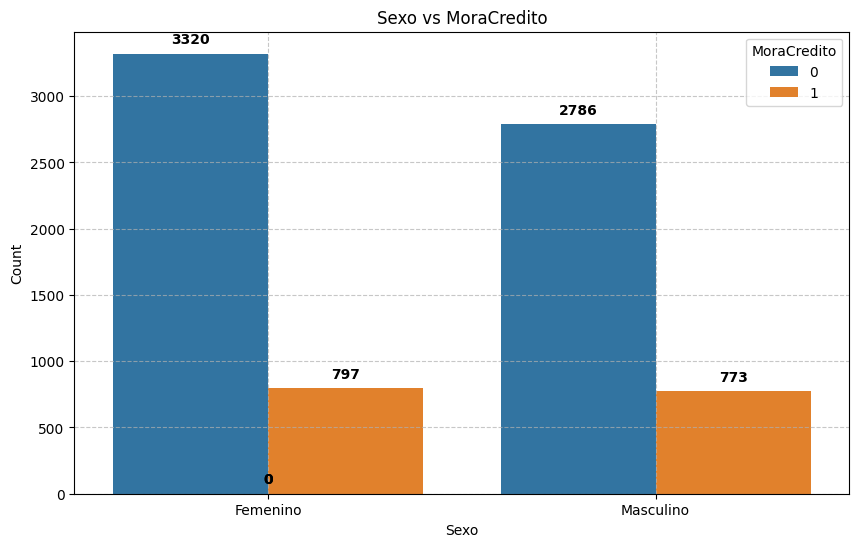

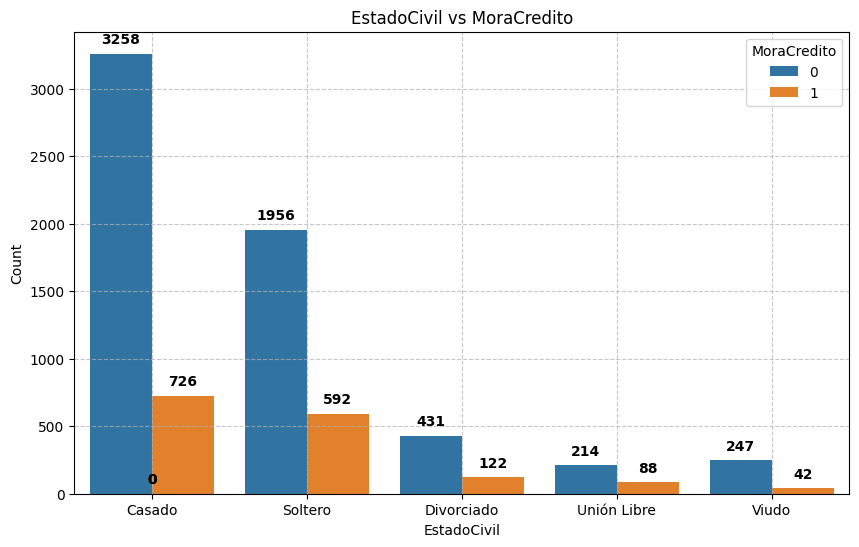

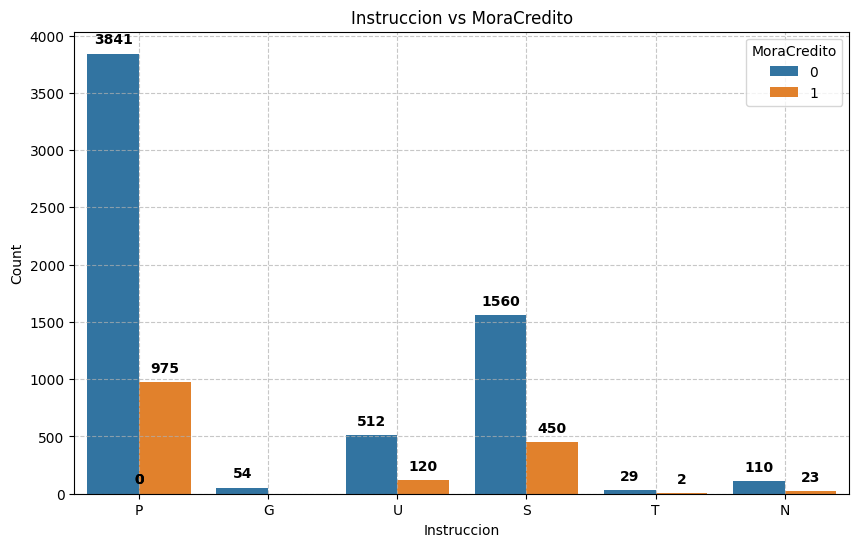

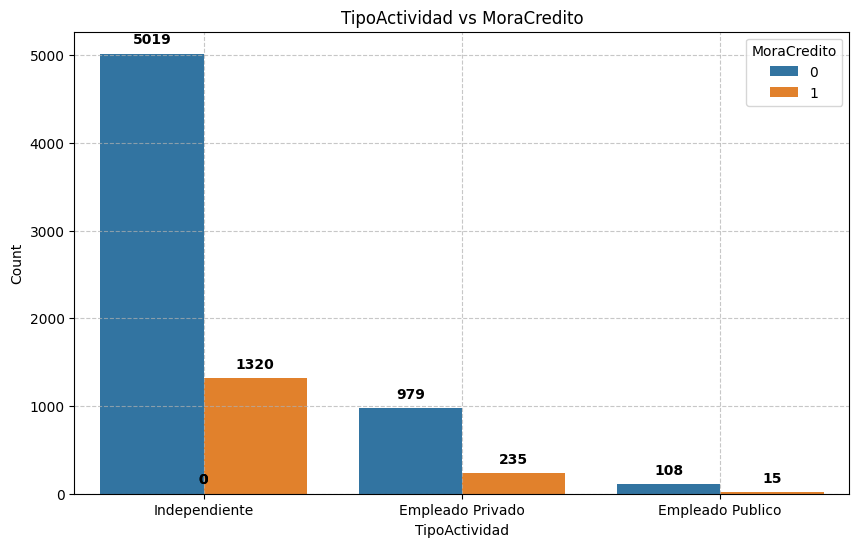

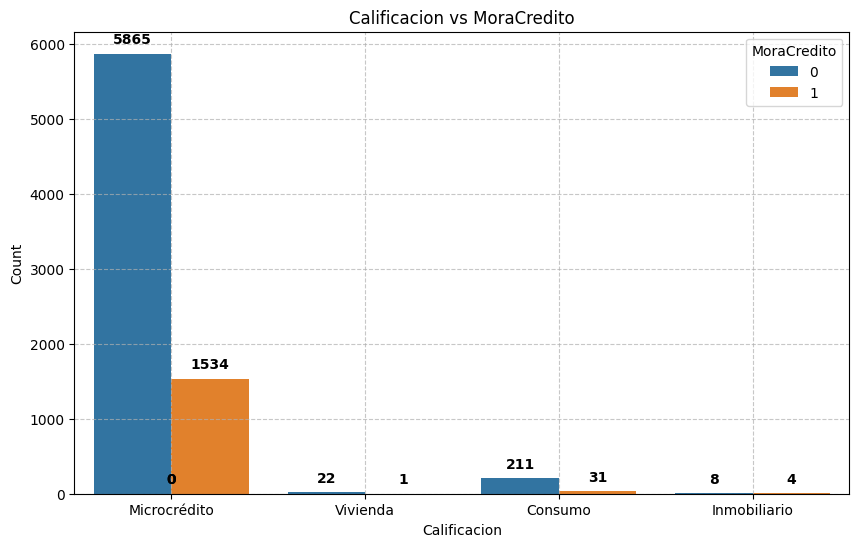

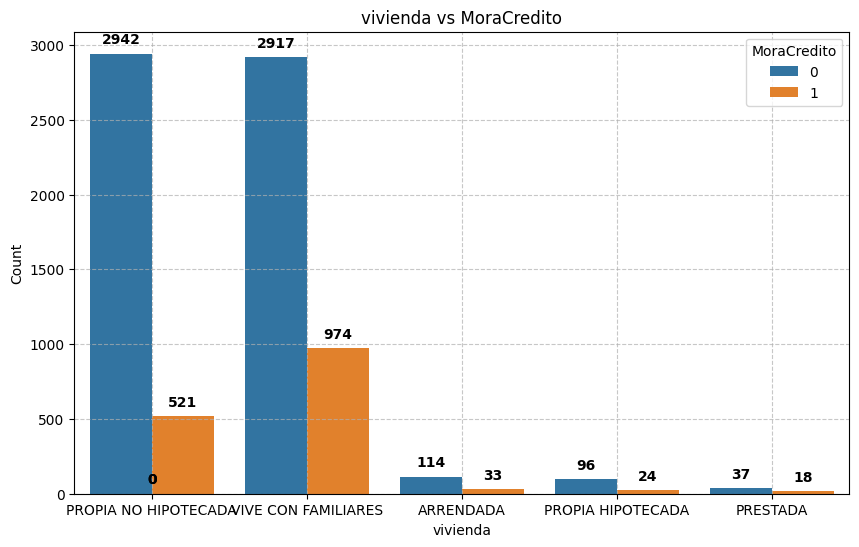

In [283]:
# Se crea lista de variables categóricas
categorical_columns = ['Sexo', 'EstadoCivil', 'Instruccion', 'TipoActividad', 'Calificacion', 'vivienda']

# Se crea gráficos de barra para cada variable categórica con respecto a "MoraCredito"
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, hue='MoraCredito', data=df)

    # Añadir la cuadrícula
    plt.grid(True, linestyle='--', alpha=0.7)

    # Mostrar los valores en cada barra
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points',
                    fontsize=10, color='black', weight='bold')

    # Personalizar el título y etiquetas
    plt.title(f'{column} vs MoraCredito')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='MoraCredito')

    # Mostrar el gráfico
    plt.show()

In [284]:
# Se aplica el test Chi Cuadrado para evaluar la asociación
# Entre la variable Sexo y la variable objetivo "MoraCredito"

# Crear la tabla de contingencia
contingenciaTablaSexo = pd.crosstab(df['Sexo'], df['MoraCredito'])
print("Tabla de Contingencia:")
print(contingenciaTablaSexo)

# Aplicar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingenciaTablaSexo)

print(f"\nChi2: {chi2}")
print(f"P-value: {p}")
print(f"Grados de libertad: {dof}")
print(f"Tabla de frecuencias esperadas:\n{expected}")

Tabla de Contingencia:
MoraCredito     0    1
Sexo                  
Femenino     3320  797
Masculino    2786  773

Chi2: 6.394771426430642
P-value: 0.011445696651363621
Grados de libertad: 1
Tabla de frecuencias esperadas:
[[3274.93512246  842.06487754]
 [2831.06487754  727.93512246]]


In [285]:
# Se aplica el test Chi Cuadrado para evaluar la asociación
# Entre la variable "EstadoCivil" y variable objetivo "MoraCreadito"

# Crear la tabla de contingencia
contingenciaTablaCivil = pd.crosstab(df['EstadoCivil'], df['MoraCredito'])
print("Tabla de Contingencia:")
print(contingenciaTablaCivil)

# Aplicar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingenciaTablaCivil)

print(f"\nChi2: {chi2}")
print(f"P-value: {p}")
print(f"Grados de libertad: {dof}")
print(f"Tabla de frecuencias esperadas:\n{expected}")

Tabla de Contingencia:
MoraCredito     0    1
EstadoCivil           
Casado       3258  726
Divorciado    431  122
Soltero      1956  592
Unión Libre   214   88
Viudo         247   42

Chi2: 45.39877696609361
P-value: 3.2848684297392316e-09
Grados de libertad: 4
Tabla de frecuencias esperadas:
[[3169.13809276  814.86190724]
 [ 439.89291298  113.10708702]
 [2026.84835852  521.15164148]
 [ 240.2308494    61.7691506 ]
 [ 229.88978635   59.11021365]]


In [286]:
# Se aplica el test Chi Cuadrado para evaluar la asociación
# Entre la variable "Instruccion" y variable objetivo "MoraCreadito"
# SIN ESTUDIOS ='N'
# PRIMARIA ='P'
# SECUNDARIA ='S'
# FORMACIÓN INTERMEDIA (TÉCNICA - TECNOLOGÍA) ='T'
# UNIVERSITARIA ='U'
# SUPERIOR ='G'

# Crear la tabla de contingencia
contingenciaTablaInt = pd.crosstab(df['Instruccion'], df['MoraCredito'])
print("Tabla de Contingencia:")
print(contingenciaTablaInt)

# Aplicar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingenciaTablaInt)

print(f"\nChi2: {chi2}")
print(f"P-value: {p}")
print(f"Grados de libertad: {dof}")
print(f"Tabla de frecuencias esperadas:\n{expected}")

Tabla de Contingencia:
MoraCredito     0    1
Instruccion           
G              54    0
N             110   23
P            3841  975
S            1560  450
T              29    2
U             512  120

Chi2: 24.024008808624195
P-value: 0.00021481857318553097
Grados de libertad: 5
Tabla de frecuencias esperadas:
[[  42.95518499   11.04481501]
 [ 105.7970297    27.2029703 ]
 [3830.96612819  985.03387181]
 [1598.88744138  411.11255862]
 [  24.65945805    6.34054195]
 [ 502.73475769  129.26524231]]


In [287]:
# Se aplica el test Chi Cuadrado para evaluar la asociación
# Entre la variable "Calificacion" y variable objetivo "MoraCreadito"

# Crear la tabla de contingencia
contingenciaTablaCali = pd.crosstab(df['Calificacion'], df['MoraCredito'])
print("Tabla de Contingencia:")
print(contingenciaTablaCali)

# Aplicar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingenciaTablaCali)

print(f"\nChi2: {chi2}")
print(f"P-value: {p}")
print(f"Grados de libertad: {dof}")
print(f"Tabla de frecuencias esperadas:\n{expected}")

Tabla de Contingencia:
MoraCredito      0     1
Calificacion            
Consumo        211    31
Inmobiliario     8     4
Microcrédito  5865  1534
Vivienda        22     1

Chi2: 13.934564996862072
P-value: 0.002995587617678681
Grados de libertad: 3
Tabla de frecuencias esperadas:
[[1.92502866e+02 4.94971339e+01]
 [9.54559666e+00 2.45440334e+00]
 [5.88565581e+03 1.51334419e+03]
 [1.82957269e+01 4.70427306e+00]]


In [288]:
# Se aplica el test Chi Cuadrado para evaluar la asociación
# Entre la variable "Tipo" y variable objetivo "MoraCreadito"

# Crear la tabla de contingencia
contingenciaTablaTipo = pd.crosstab(df['tipo'], df['MoraCredito'])
print("Tabla de Contingencia:")
print(contingenciaTablaTipo)

# Aplicar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingenciaTablaTipo)

print(f"\nChi2: {chi2}")
print(f"P-value: {p}")
print(f"Grados de libertad: {dof}")
print(f"Tabla de frecuencias esperadas:\n{expected}")

Tabla de Contingencia:
MoraCredito                  0     1
tipo                                
Ordinario Cuota Fija      5141  1299
Ordinario Cuota Variable   965   271

Chi2: 1.8561656562765485
P-value: 0.17306799154532593
Grados de libertad: 1
Tabla de frecuencias esperadas:
[[5122.80354351 1317.19645649]
 [ 983.19645649  252.80354351]]


In [289]:
# Se aplica el test Chi Cuadrado para evaluar la asociación
# Entre la variable "vivienda" y variable objetivo "MoraCreadito"

# Crear la tabla de contingencia
contingenciaTablavivienda = pd.crosstab(df['vivienda'], df['MoraCredito'])
print("Tabla de Contingencia:")
print(contingenciaTablavivienda)

# Aplicar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingenciaTablavivienda)

print(f"\nChi2: {chi2}")
print(f"P-value: {p}")
print(f"Grados de libertad: {dof}")
print(f"Tabla de frecuencias esperadas:\n{expected}")

Tabla de Contingencia:
MoraCredito              0    1
vivienda                       
ARRENDADA              114   33
PRESTADA                37   18
PROPIA HIPOTECADA       96   24
PROPIA NO HIPOTECADA  2942  521
VIVE CON FAMILIARES   2917  974

Chi2: 117.86996690905632
P-value: 1.5224473564062367e-24
Grados de libertad: 4
Tabla de frecuencias esperadas:
[[ 116.93355915   30.06644085]
 [  43.75065138   11.24934862]
 [  95.45596665   24.54403335]
 [2754.70010422  708.29989578]
 [3095.1597186   795.8402814 ]]


In [290]:
#Se convierte la categoría "Sexo" en variable dummies

df = pd.get_dummies(df, columns=['Sexo'], dtype=int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7676 entries, 0 to 7679
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EstadoCivil      7676 non-null   object 
 1   FechaNacimiento  7676 non-null   object 
 2   Instruccion      7676 non-null   object 
 3   CodigoBarrio     7676 non-null   int64  
 4   NumeroCargas     7676 non-null   int64  
 5   TipoActividad    7676 non-null   object 
 6   NumeroCredito    7676 non-null   int64  
 7   Monto            7676 non-null   float64
 8   NumeroCuotas     7676 non-null   int64  
 9   ValorCuota       7676 non-null   float64
 10  FechaEntrega     7676 non-null   object 
 11  Tasa             7676 non-null   float64
 12  Calificacion     7676 non-null   object 
 13  encaje           7676 non-null   float64
 14  tipo             7676 non-null   object 
 15  vivienda         7676 non-null   object 
 16  totalActivo      7676 non-null   float64
 17  totalPasivo      76

In [291]:
#Se convertir la categoría "EstadoCivil" en variable dummies
df = pd.get_dummies(df, columns=['EstadoCivil'], dtype=int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7676 entries, 0 to 7679
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FechaNacimiento          7676 non-null   object 
 1   Instruccion              7676 non-null   object 
 2   CodigoBarrio             7676 non-null   int64  
 3   NumeroCargas             7676 non-null   int64  
 4   TipoActividad            7676 non-null   object 
 5   NumeroCredito            7676 non-null   int64  
 6   Monto                    7676 non-null   float64
 7   NumeroCuotas             7676 non-null   int64  
 8   ValorCuota               7676 non-null   float64
 9   FechaEntrega             7676 non-null   object 
 10  Tasa                     7676 non-null   float64
 11  Calificacion             7676 non-null   object 
 12  encaje                   7676 non-null   float64
 13  tipo                     7676 non-null   object 
 14  vivienda                 7676

In [292]:
# Separamos los datos de "FechaNacimiento" para calcular posteriormente la columna "EdadAlCredito"

df[["DiaNacimiento", "MesNacimiento", "AnioNacimiento"]] = df["FechaNacimiento"].str.split("/", n = 2, expand = True)
df["AnioNacimiento"].value_counts()

,count
AnioNacimiento,
1991,286
1981,259
1990,257
1984,253
1992,243
...,...
1942,3
1937,3
1936,2


In [293]:
# Definir un mapeo para convertir de Instruccion categórica a numérica
#El orden es desde estudios básicos a superiores
mapeo_intruccion = {
    'N': 0,  # SIN ESTUDIOS
    'P': 1,  # PRIMARIA
    'S': 2,  # SECUNDARIA
    'T': 3,  # FORMACIÓN INTERMEDIA (TÉCNICA - TECNOLOGÍA)
    'U': 4,  # UNIVERSITARIA
    'G': 5   # SUPERIOR
}
df['Instruccion'] = df['Instruccion'].map(mapeo_intruccion)
df["Instruccion"].value_counts()

,count
Instruccion,
1,4816
2,2010
4,632
0,133
5,54
3,31


In [294]:
# Se observa la categoría "CodigoBarrio"

df["CodigoBarrio"].value_counts()

,count
CodigoBarrio,
18095004,319
18096801,298
18096804,273
18096504,234
18096606,211
...,...
17011901,1
17013001,1
18045024,1


In [295]:
# Se observa la variable "NumeroCargas"

df["NumeroCargas"].value_counts()

,count
NumeroCargas,
0,5142
1,1216
2,917
3,311
4,74
5,12
6,4


In [296]:
#Se convierte la categoría "TipoActividad" en numérica
# Con el método Label Encoding

# Instanciamos el LabelEncoder
LabelEncoderAct = LabelEncoder()

df['TipoActividad'] = LabelEncoderAct.fit_transform(df['TipoActividad'])

# Ver el mapeo
mapping = dict(zip(LabelEncoderAct.classes_, LabelEncoderAct.transform(LabelEncoderAct.classes_)))
print(mapping)

df["TipoActividad"].value_counts()

{'Empleado Privado': 0, 'Empleado Publico': 1, 'Independiente': 2}


,count
TipoActividad,
2,6339
0,1214
1,123


In [297]:
#Se observa "NumeroCredito"

df["NumeroCredito"].value_counts()

,count
NumeroCredito,
4729,8
9389,8
2219,6
3003,6
1253,6
...,...
5900,1
6782,1
4698,1


In [298]:
# Se decide eliminar la variable "NumeroCredito"
# por ser un valor único que no aporta valor a la predicción
# de MoraCredito

df.drop("NumeroCredito", axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7676 entries, 0 to 7679
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FechaNacimiento          7676 non-null   object 
 1   Instruccion              7676 non-null   int64  
 2   CodigoBarrio             7676 non-null   int64  
 3   NumeroCargas             7676 non-null   int64  
 4   TipoActividad            7676 non-null   int64  
 5   Monto                    7676 non-null   float64
 6   NumeroCuotas             7676 non-null   int64  
 7   ValorCuota               7676 non-null   float64
 8   FechaEntrega             7676 non-null   object 
 9   Tasa                     7676 non-null   float64
 10  Calificacion             7676 non-null   object 
 11  encaje                   7676 non-null   float64
 12  tipo                     7676 non-null   object 
 13  vivienda                 7676 non-null   object 
 14  totalActivo              7676

In [299]:
# Se observa la variable "NumeroCuotas"

df["NumeroCuotas"].value_counts()

,count
NumeroCuotas,
12,1985
24,1319
36,509
18,475
8,340
...,...
80,1
58,1
96,1


In [300]:
# Se observa la categoría "FechaEntrega"
# Separamos los datos de "FechaEntrega" para calcular posteriormente la columna "EdadAlCredito"

df["FechaEntrega"].value_counts()
df[["DiaEntrega", "MesEntrega", "AnioEntrega"]] = df["FechaEntrega"].str.split("/", n = 2, expand = True)
df["AnioEntrega"].value_counts()

,count
AnioEntrega,
2019,943
2020,837
2018,766
2021,743
2017,688
2016,672
2022,637
2014,604
2015,549


In [301]:
# Cambiamos los datos de las columnas "AñoNacimiento" y "AñoEntrega" a números, para calcular la columna "EdadAlCredito"
cambio_anios = {"AnioNacimiento": int, "AnioEntrega": int}
df = df.astype(cambio_anios)

# Creamos la columna "EdadAlCredito"
df["EdadAlCredito"] = df["AnioEntrega"] - df["AnioNacimiento"]
# Se elimina la variable "FechaNacimiento"
df.drop("FechaNacimiento", axis = 1, inplace = True)
# Se elimna la variable "FechaEntrega"
df.drop("FechaEntrega", axis = 1, inplace = True)
# Se elimna la variable "DiaNacimiento"
df.drop("DiaNacimiento", axis = 1, inplace = True)
# Se elimna la variable "MesNacimiento"
df.drop("MesNacimiento", axis = 1, inplace = True)
# Se elimna la variable "AnioNacimiento"
df.drop("AnioNacimiento", axis = 1, inplace = True)
# Se elimna la variable "DiaEntrega"
df.drop("DiaEntrega", axis = 1, inplace = True)
# Se elimna la variable "MesEntrega"
df.drop("MesEntrega", axis = 1, inplace = True)
# Se elimna la variable "AnioEntrega"
df.drop("AnioEntrega", axis = 1, inplace = True)
df["EdadAlCredito"].value_counts()

,count
EdadAlCredito,
25,271
26,263
29,262
23,255
24,252
...,...
73,6
84,1
79,1


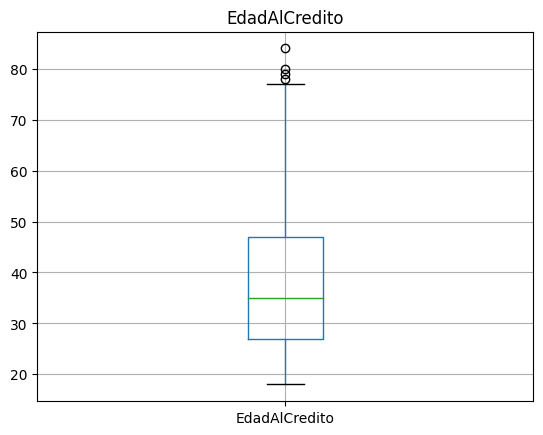

In [302]:
# Se observa la nueva variable creada con un gráfico de caja
df.boxplot(column=["EdadAlCredito"])
plt.title("EdadAlCredito")
plt.show()

In [303]:
# Crear una función para clasificar las edades en grupos personalizados
def clasificar_edad_personalizada(edad):
    if edad < 30:
        return 'Juvenil'
    elif 30 <= edad < 50:
        return 'Adulto'
    else:
        return 'Senior'

# Aplicar la función a la columna de edad
df['GrupoEdad'] = df['EdadAlCredito'].apply(clasificar_edad_personalizada)
# Eliminar la variable "EdadAlCredito"
df.drop("EdadAlCredito", axis = 1, inplace = True)

# Mapeo de categorías a valores numéricos
mapeo_edad = {'Juvenil': 0, 'Adulto': 1, 'Senior': 2}

# Aplicar el mapeo a la columna 'GrupoEdad'
df['GrupoEdad'] = df['GrupoEdad'].map(mapeo_edad)

# Verificar los valores numéricos en 'GrupoEdad'
print(df["GrupoEdad"].value_counts())

GrupoEdad
1    3423
0    2586
2    1667
Name: count, dtype: int64


In [304]:
# Se observa la categoría "Tasa"

df["Tasa"].value_counts()

,count
Tasa,
21.50,2601
22.50,776
21.00,569
23.00,536
19.75,438
22.44,398
20.50,377
19.97,350
19.50,271


In [305]:
#Se convierte la categoría "Calificacion" en numérica
# Con el método Label Encoding

# Instanciamos el LabelEncoder
LabelEncoderCali = LabelEncoder()

df['Calificacion'] = LabelEncoderCali.fit_transform(df['Calificacion'])

# Ver el mapeo
mapping = dict(zip(LabelEncoderCali.classes_, LabelEncoderCali.transform(LabelEncoderCali.classes_)))
print(mapping)

df["Calificacion"].value_counts()

{'Consumo': 0, 'Inmobiliario': 1, 'Microcrédito': 2, 'Vivienda': 3}


,count
Calificacion,
2,7399
0,242
3,23
1,12


In [306]:
#Se convierte la categoría "Tipo" en numérica
# Con el método Label Encoding

# Instanciamos el LabelEncoder
LabelEncoderTipo = LabelEncoder()

df['tipo'] = LabelEncoderTipo.fit_transform(df['tipo'])

# Ver el mapeo
mapping = dict(zip(LabelEncoderTipo.classes_, LabelEncoderTipo.transform(LabelEncoderTipo.classes_)))
print(mapping)

df["tipo"].value_counts()

{'Ordinario Cuota Fija': 0, 'Ordinario Cuota Variable': 1}


,count
tipo,
0,6440
1,1236


In [307]:
#Se convierte la categoría "vivienda" en variable dummies

df = pd.get_dummies(df, columns=['vivienda'], dtype=int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7676 entries, 0 to 7679
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Instruccion                    7676 non-null   int64  
 1   CodigoBarrio                   7676 non-null   int64  
 2   NumeroCargas                   7676 non-null   int64  
 3   TipoActividad                  7676 non-null   int64  
 4   Monto                          7676 non-null   float64
 5   NumeroCuotas                   7676 non-null   int64  
 6   ValorCuota                     7676 non-null   float64
 7   Tasa                           7676 non-null   float64
 8   Calificacion                   7676 non-null   int64  
 9   encaje                         7676 non-null   float64
 10  tipo                           7676 non-null   int64  
 11  totalActivo                    7676 non-null   float64
 12  totalPasivo                    7676 non-null   float6

In [308]:
# Se calcula la diferencia entre Activos - Pasivos

df['Patrimonio'] = df['totalActivo'] - df['totalPasivo']
df["Patrimonio"].value_counts()

,count
Patrimonio,
0.00,2444
1500.00,44
1000.00,39
5000.00,35
4000.00,32
...,...
12999.99,1
1920.00,1
3199.99,1


In [309]:
# Se calcula la diferencia entre Ingresos - Gastos

df['Disponible'] = df['totalActivo'] - df['totalPasivo']
df["Disponible"].value_counts()

,count
Disponible,
0.00,2444
1500.00,44
1000.00,39
5000.00,35
4000.00,32
...,...
12999.99,1
1920.00,1
3199.99,1


In [310]:
# Se observa la categoría a predecir "MoraCredito"

df["MoraCredito"].value_counts()

,count
MoraCredito,
0,6106
1,1570


In [311]:
# Revisamos que las variables esten en el formato numérico

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7676 entries, 0 to 7679
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Instruccion                    7676 non-null   int64  
 1   CodigoBarrio                   7676 non-null   int64  
 2   NumeroCargas                   7676 non-null   int64  
 3   TipoActividad                  7676 non-null   int64  
 4   Monto                          7676 non-null   float64
 5   NumeroCuotas                   7676 non-null   int64  
 6   ValorCuota                     7676 non-null   float64
 7   Tasa                           7676 non-null   float64
 8   Calificacion                   7676 non-null   int64  
 9   encaje                         7676 non-null   float64
 10  tipo                           7676 non-null   int64  
 11  totalActivo                    7676 non-null   float64
 12  totalPasivo                    7676 non-null   float6

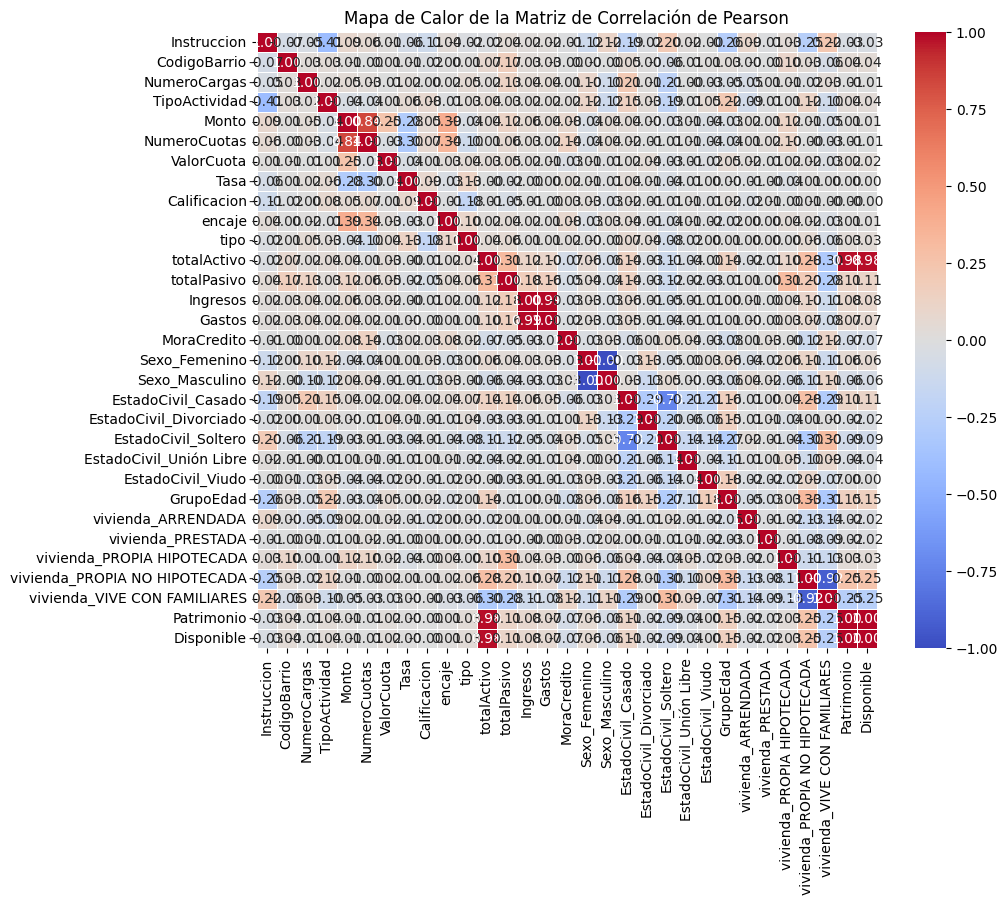

In [312]:
# Calcular la matriz de correlación de Pearson
MatrizCorrelacionPearson = df.corr(method='pearson')

# Crear un mapa de calor utilizando seaborn
plt.figure(figsize=(10, 8))  # Tamaño del gráfico
sns.heatmap(MatrizCorrelacionPearson, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Correlación de Pearson')
plt.show()

In [313]:
# Calcula la correlación de Pearson de todas las variables con respecto a 'MoraCredito'
correlacion_pearson = df.corr(method='pearson')['MoraCredito'].sort_values(ascending=False)

# Imprime el resultado
print(correlacion_pearson)

MoraCredito                      1.000000
NumeroCuotas                     0.139309
vivienda_VIVE CON FAMILIARES     0.115094
encaje                           0.084312
Monto                            0.080868
EstadoCivil_Soltero              0.048592
EstadoCivil_Unión Libre          0.043578
Sexo_Masculino                   0.029187
Calificacion                     0.028785
vivienda_PRESTADA                0.025850
Tasa                             0.024919
TipoActividad                    0.016186
tipo                             0.015990
NumeroCargas                     0.013907
EstadoCivil_Divorciado           0.011109
vivienda_ARRENDADA               0.006913
CodigoBarrio                    -0.000592
vivienda_PROPIA HIPOTECADA      -0.001416
Instruccion                     -0.013005
Gastos                          -0.023136
EstadoCivil_Viudo               -0.029032
Sexo_Femenino                   -0.029187
Ingresos                        -0.030324
ValorCuota                      -0

In [314]:
# #df.drop("Sexo", axis = 1, inplace = True)
# # df.drop("EstadoCivil", axis = 1, inplace = True)
# df.drop("TipoActividad", axis = 1, inplace = True)
# df.drop("NumeroCargas", axis = 1, inplace = True)
# # df.drop("Tasa", axis = 1, inplace = True)
df.drop("CodigoBarrio", axis = 1, inplace = True)
# # # df.drop("EdadAlCredito", axis = 1, inplace = True)
#df.drop("vivienda_ARRENDADA", axis = 1, inplace = True)
#df.drop("Instruccion", axis = 1, inplace = True)
#df.drop("vivienda_PROPIA HIPOTECADA", axis = 1, inplace = True)
# # df.drop("Calificacion", axis = 1, inplace = True)
# # df.drop("ValorCuota", axis = 1, inplace = True)
# df.drop("tipo", axis = 1, inplace = True)
# df.drop("totalActivo", axis = 1, inplace = True)
# df.drop("totalPasivo", axis = 1, inplace = True)
# df.drop("Ingresos", axis = 1, inplace = True)
# df.drop("Gastos", axis = 1, inplace = True)
# # df.drop("vivienda", axis = 1, inplace = True)
# df.info()

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7676 entries, 0 to 7679
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Instruccion                    7676 non-null   int64  
 1   NumeroCargas                   7676 non-null   int64  
 2   TipoActividad                  7676 non-null   int64  
 3   Monto                          7676 non-null   float64
 4   NumeroCuotas                   7676 non-null   int64  
 5   ValorCuota                     7676 non-null   float64
 6   Tasa                           7676 non-null   float64
 7   Calificacion                   7676 non-null   int64  
 8   encaje                         7676 non-null   float64
 9   tipo                           7676 non-null   int64  
 10  totalActivo                    7676 non-null   float64
 11  totalPasivo                    7676 non-null   float64
 12  Ingresos                       7676 non-null   float6

In [316]:
# Se separa las variables independientes (X) y la variable dependiente (y)

x_data = df.drop(["MoraCredito"], axis = 1)
y_data = df["MoraCredito"]

In [317]:
# separar los datos en entrenamiento y prueba

x_val, x_test_, y_val, y_test_ = train_test_split(x_data, y_data, test_size = 0.3, stratify = y_data, random_state = 42)

In [318]:
#  cuantos datos tenemos de entrenamiento

len(x_val)

5373

In [319]:
#  cuantos datos tenemos de prueba

len(x_test_)

2303

In [320]:
# Se observa como es la particion de la variable a predecir
# de los datos de entrenamiento

y_val.value_counts()

,count
MoraCredito,
0,4274
1,1099


In [321]:
# Se observa como es la particion de la variable a predecir
# de los datos de prueba

y_test_.value_counts()

,count
MoraCredito,
0,1832
1,471


In [322]:
# Se aplica sobremuestreo aleatorio sobre los datos de entrenamiento

ROS =  RandomOverSampler(sampling_strategy = 0.8, random_state = 1)

nuevos_x, nuevos_y = ROS.fit_resample(x_val, y_val)
nuevos_x = pd.DataFrame(nuevos_x, columns = x_val.columns)
nuevos_y = pd.DataFrame(nuevos_y, columns = ["MoraCredito"])

data_balanceada_train = pd.concat([nuevos_x, nuevos_y], axis=1)

In [323]:
# Se observan los datos de "MoraCredito" después del sobremuestreo

data_balanceada_train["MoraCredito"].value_counts()

,count
MoraCredito,
0,4274
1,3419


In [324]:
# Se separa los valores de "X" y "Y" de entrenamiento después del sobremuestro

x_train = data_balanceada_train.drop(["MoraCredito"], axis = 1)
y_train = data_balanceada_train["MoraCredito"]

In [325]:
# Se aplica sobremuestreo aleatorio sobre los datos de prueba

# Instanciamos el RandomOverSampler
ROS1 =  RandomOverSampler(sampling_strategy = 0.8, random_state = 1)

nuevos_x1, nuevos_y1 = ROS1.fit_resample(x_test_, y_test_)
nuevos_x1 = pd.DataFrame(nuevos_x1, columns = x_test_.columns)
nuevos_y1 = pd.DataFrame(nuevos_y1, columns = ["MoraCredito"])

data_balanceada_test = pd.concat([nuevos_x1, nuevos_y1], axis=1)
data_balanceada_test.head()

,Instruccion,NumeroCargas,TipoActividad,Monto,NumeroCuotas,ValorCuota,Tasa,Calificacion,encaje,tipo,...,EstadoCivil_Viudo,GrupoEdad,vivienda_ARRENDADA,vivienda_PRESTADA,vivienda_PROPIA HIPOTECADA,vivienda_PROPIA NO HIPOTECADA,vivienda_VIVE CON FAMILIARES,Patrimonio,Disponible,MoraCredito
0,1,0,2,1800.0,18,100.00,20.0,2,85.5,0,...,0,1,0,0,0,1,0,12096.12,12096.12,0
1,1,0,2,1500.0,12,125.00,20.0,2,0.0,0,...,0,1,0,0,0,0,1,0.00,0.00,0
2,2,1,1,2000.0,24,83.33,21.5,2,0.0,0,...,1,2,0,0,0,1,0,35010.04,35010.04,0
3,2,0,2,1500.0,12,125.00,21.0,2,0.0,1,...,0,0,0,0,0,0,1,0.00,0.00,0
4,2,0,2,2000.0,24,83.33,21.5,2,0.0,0,...,0,0,0,0,0,0,1,2610.46,2610.46,0


In [326]:
# Se observa los datos de prueba después del sobremuestreo

data_balanceada_test["MoraCredito"].value_counts()

,count
MoraCredito,
0,1832
1,1465


In [327]:
# Separamos los valores de "X" y "Y" de prueba después del sobremuestro

x_test = data_balanceada_test.drop(["MoraCredito"], axis = 1)
y_test = data_balanceada_test["MoraCredito"]

In [328]:
##########  Regresion Logística ##############

# Instanciamos el modelo
modelo_regresion_log = LogisticRegression(max_iter=1000)
# Entrenamos el modelo con los datos de entrenamiento (train)
modelo_regresion_log = modelo_regresion_log.fit(x_train, y_train)

# Hacemos la predicción del modelo entrenado sobre los datos de prueba (test)
y_pred_rl = modelo_regresion_log.predict(x_test)

In [329]:
# Matriz de confusión para evaluar el rendimiento del modelo
# Con Regresión Logistica

confusion_rl = confusion_matrix(y_test, y_pred_rl)
confusion_rl

array([[1434,  398],
       [ 865,  600]])

In [330]:
# Evaluamos el accuracy del modelo entrenado
# Con Regresión Logistica

accuracy_score(y_test, y_pred_rl)

0.6169244767970883

In [331]:
####### Arbol de decision ##########

# Instanciamos el modelo
modelo_arbol = DecisionTreeClassifier(max_depth = 5, random_state = 42)

# Entrenamos el modelo con los datos de entrenamiento (train)
modelo_arbol = modelo_arbol.fit(x_train, y_train)

# Hacemos la predicción del modelo entrenado sobre los datos de prueba (test)
y_pred_ad = modelo_arbol.predict(x_test)

In [332]:
# Matriz de confusión para evaluar el modelo

confusion_ad = confusion_matrix(y_test, y_pred_ad)
confusion_ad

array([[1246,  586],
       [ 612,  853]])

In [333]:
# Evaluamos el accuracy del modelo entrenado

accuracy_score(y_test, y_pred_ad)

0.6366393691234455

In [334]:
########### Random Forest ############

# Instanciamos el modelo
modelo_bosque = RandomForestClassifier(n_estimators = 500, random_state = 42, max_depth = 5)

# Entrenamos el modelo con los datos de entrenamiento (train)
modelo_bosque.fit(x_train,y_train)

# Hacemos la predicción del modelo entrenado sobre los datos de prueba (test)
y_pred_ba = modelo_bosque.predict(x_test)

In [335]:
# Matriz de confusión para evaluar el modelo

confusion_ba = confusion_matrix(y_test, y_pred_ba)
confusion_ba

array([[1428,  404],
       [ 815,  650]])

In [336]:
# Evaluamos el accuracy del modelo entrenado

accuracy_score(y_test, y_pred_ba)

0.6302699423718532

In [337]:
# Crear una instancia del clasificador XGBoost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
xgb_model = xgb.XGBClassifier(
    n_estimators=100,       # Número de árboles
    max_depth=5,            # Profundidad máxima del árbol
    learning_rate=0.1,      # Tasa de aprendizaje
    random_state=42,      # Asegura la reproducibilidad
    use_label_encoder=False # Desactivar la codificación de etiquetas para evitar advertencias
)

# Entrenar el modelo
xgb_model.fit(x_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_xgboost1 = xgb_model.predict(x_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_xgboost1)
print(f"Accuracy: {accuracy:.2f}")

# Mostrar el reporte de clasificación
print("Classification Report:\n", classification_report(y_test, y_pred_xgboost1))

# Mostrar la matriz de confusión
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgboost1))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:17:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.76      0.72      1832
           1       0.65      0.55      0.60      1465

    accuracy                           0.67      3297
   macro avg       0.66      0.66      0.66      3297
weighted avg       0.67      0.67      0.66      3297

Confusion Matrix:
 [[1393  439]
 [ 657  808]]


In [338]:
# Se implementa la técnica de sobremuestreo SMOTE
# Aumenta la cantidad de muestras en la clase minoritaria
from imblearn.over_sampling import SMOTE

smote = SMOTE()  # Puedes ajustar random_state para reproducibilidad

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(x_data, y_data)

# Crear un DataFrame con los datos balanceados
df_smote = pd.DataFrame(X_smote, columns=x_data.columns)
df_smote['MoraCredito'] = y_smote

# Ver el resultado
print(df_smote['MoraCredito'].value_counts())

MoraCredito
0    6106
1    6106
Name: count, dtype: int64


In [339]:
# Separar características y variable objetivo
X_smote = df_smote.drop('MoraCredito', axis=1)
y_smote = df_smote['MoraCredito']

In [340]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

In [341]:
########### Random Forest ############

# Instanciamos el modelo
modelo_bosque = RandomForestClassifier(n_estimators = 500, random_state = 42, max_depth = 5)

# Entrenamos el modelo con los datos de entrenamiento (train)
modelo_bosque.fit(X_train,y_train)

# Hacemos la predicción del modelo entrenado sobre los datos de prueba (test)
y_pred_ba_smote = modelo_bosque.predict(X_test)

In [342]:
# Matriz de confusión para evaluar el modelo

confusion_ad = confusion_matrix(y_test, y_pred_ba_smote)
confusion_ad

array([[1323,  519],
       [ 374, 1448]])

In [343]:
# Evaluamos el accuracy del modelo entrenado

accuracy_score(y_test, y_pred_ba_smote)

0.7562772925764192

In [344]:
########### XGBoost ############
# Crear una instancia del clasificador XGBoost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
xgb_model = xgb.XGBClassifier(
    n_estimators=500,       # Número de árboles
    max_depth=5,            # Profundidad máxima del árbol
    learning_rate=0.1,      # Tasa de aprendizaje
    random_state=42,        # Asegura la reproducibilidad
    use_label_encoder=False # Desactivar la codificación de etiquetas para evitar advertencias
)

# Entrenar el modelo
xgb_model.fit(X_train,y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_xgboost2 = xgb_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_xgboost2)
print(f"Accuracy: {accuracy:.2f}")

# Mostrar el reporte de clasificación
print("Classification Report:\n", classification_report(y_test, y_pred_xgboost2))

# Mostrar la matriz de confusión
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgboost2))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:17:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1842
           1       0.88      0.83      0.85      1822

    accuracy                           0.86      3664
   macro avg       0.86      0.86      0.86      3664
weighted avg       0.86      0.86      0.86      3664

Confusion Matrix:
 [[1630  212]
 [ 307 1515]]


In [345]:
y_pred_xgboost2

array([0, 0, 0, ..., 1, 1, 0])